In [1]:
e0=0.9

In [2]:
import os
os.chdir('runK'+str(e0))

In [3]:
! python3 split2.py 12 1

0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
2
2
3
4
2
2
3
3
3
3
2
2
2
2
2
4
3
4
4
4
3
3
3
4
3
3
3
4
4
4
4
4
4


In [4]:
#%matplotlib qt 
import numpy as np
from constants import *
from functions import g, F, peak_freq, gT
from ef import solve_ecc, k
from scipy import integrate
from numpy import log10 as lg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
from scipy import interpolate
from scipy.integrate import simps
import pickle
from scipy.interpolate import interp1d

In [5]:
specarr=pickle.load(open('multicore2/specarrK.pkl', 'rb'))

In [6]:
specarrQ=pickle.load(open('../runQ/runQ'+str(e0)+'/multicoreQ/bigarrQ.pkl', 'rb'))

In [7]:
sizem,sizeg,sizez,sizef=np.shape(specarr)

In [8]:
fi=1e-9
ff=10**(-6.5)
f0=1e-9

In [9]:
Mc1=1e6*MS;Mc2=1e10*MS
Mstar=1e8*MS
zstar=2
z1=0.02
z2=5
eta1=0.08
eta2=0.25

In [10]:
farr=np.logspace(lg(fi),lg(ff),sizef)
Mcarr=np.logspace(lg(Mc1/MS),lg(Mc2/MS),sizem)*MS
zarr=np.linspace(z1,z2,sizez)
etaarr=np.linspace(eta1,eta2,sizeg)

In [11]:
hc2arr=np.array([simps(simps(simps(specarr[:,:,:,ff],Mcarr),etaarr),zarr) for ff in range(sizef)])
hc2arrone=np.array([simps(simps(specarr[:,0,:,ff],Mcarr),zarr) for ff in range(sizef)])

In [12]:
fnew=np.logspace(-9,-7,sizef)

In [13]:
# plt.plot(lg(fnew),lg(hc2arr)/2,label='k-shifted: 'r'$\int d\eta$')
# plt.plot(lg(fnew),lg(hc2arrone)/2,label='k-shifted: 'r'$\eta=1/4$')
# plt.xlim([lg(fi),-7])
# plt.ylabel(r'$\log_{10} \ h_c$')
# plt.xlabel(r'$\log_{10}(f $ [Hz])')
# plt.title('model AN:'+' $e_0=0.3, f_0=10^{-9}$ Hz')
# plt.legend()
# plt.show()

# Comparing with Newtonian

In [14]:
sizemQ,sizezQ,sizefQ=np.shape(specarrQ)
farrQ=np.logspace(-9,-7,sizefQ)

In [15]:
dn0=1e-4*Mpc**(-3)/Gyr
H0=70*1e3/(Mpc)

In [16]:
def comoving_density_AN(Mc,z):
    dzdt=(1+z)*np.sqrt(0.3*(1+z)**3+0.7)
    w=((1+z)**2*np.exp(-Mc/Mstar)*np.exp(-z/zstar))/dzdt
    allf=w/Mc*dn0/H0
    return allf

In [17]:
Y1=np.zeros((sizemQ,sizezQ,sizefQ))
for i in range(sizemQ):
    for j in range(sizezQ):
        for k in range(sizefQ):
            #Y1[i][j][k]=4*G/(np.pi*c**2*farr[i])*Y[i][j][k]*nm(Mcarr[j])*nz(zarr[k])*dn0/H0
            Y1[i][j][k]=4*G/(np.pi*c**2*farrQ[k])*specarrQ[i][j][k]*comoving_density_AN(Mcarr[i],zarr[j])

hc2arrQ=np.array([simps(simps(Y1[:,:,yy],Mcarr),zarr) for yy in range(sizefQ)])

In [18]:
len(lg(hc2arrQ)/2)

50

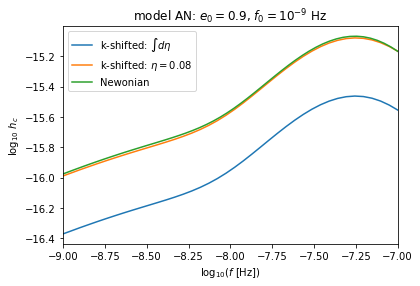

In [19]:
plt.plot(lg(fnew),lg(hc2arr)/2,label='k-shifted: 'r'$\int d\eta$')
plt.plot(lg(fnew),lg(hc2arrone)/2,label='k-shifted: 'r'$\eta=0.08$')
plt.plot(lg(farrQ),lg(hc2arrQ)/2,label='Newonian')
plt.xlim([lg(fi),-7])
plt.ylabel(r'$\log_{10} \ h_c$')
plt.xlabel(r'$\log_{10}(f $ [Hz])')
plt.title('model AN:'+' $e_0=$'+str(e0)+', $f_0=10^{-9}$ Hz')
plt.legend()
plt.savefig('modelAN_'+str(e0)+'.pdf',dpi=1000)
plt.show()

In [20]:
np.savetxt('../data_'+str(e0)+'.csv',np.stack((lg(fnew),lg(hc2arr)/2,lg(hc2arrone)/2), axis=-1))

In [21]:
np.savetxt('../data_Q'+str(e0)+'.csv',np.stack((lg(farrQ),lg(hc2arrQ)/2), axis=-1))

In [22]:
pwd

'/media/subhajit/subhajit2/Research/eGWB/recent/runK0.9'